In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle
import geopandas as gpd


/lhome/malanm/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


https://medium.com/digital-catapult/dealing-with-imbalanced-data-8b21e6deb6cd

**Importing data**

In [3]:
filename_1 = "../data/_tarefelt1.csv"

In [4]:
X = pd.read_csv(filename_1)


**Analysing variance**

In [5]:
X.columns

Index(['Unnamed: 0', 'band_0', 'band_1', 'band_2', 'band_3', 'band_4',
       'band_5', 'band_6', 'band_7', 'band_8', 'band_9', 'band_10', 'band_11',
       'band_12', 'band_13', 'band_14', 'band_15', 'band_16', 'band_17',
       'band_18', 'band_19', 'band_20', 'band_21', 'band_22', 'band_23',
       'band_24', 'band_25', 'band_26', 'band_27', 'band_28', 'band_29',
       'band_30', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35',
       'band_36', 'band_37', 'band_38', 'band_39', 'band_40', 'band_41',
       'band_42', 'band_43', 'band_44', 'band_45', 'band_46', 'band_47',
       'band_48', 'band_49', 'band_50', 'band_51', 'band_52', 'band_53',
       'band_54', 'band_55', 'band_56', 'band_57', 'band_58', 'band_59',
       'band_60', 'band_61', 'band_62', 'band_63', 'band_64', 'band_65', 'lat',
       'lon', 'geometry', 'label'],
      dtype='object')

In [18]:
X_var = X.drop(columns = ['lat','lon', 'geometry', 'Unnamed: 0'])

Text(0.5, 0.98, 'Intensiteten til de ulike båndene')

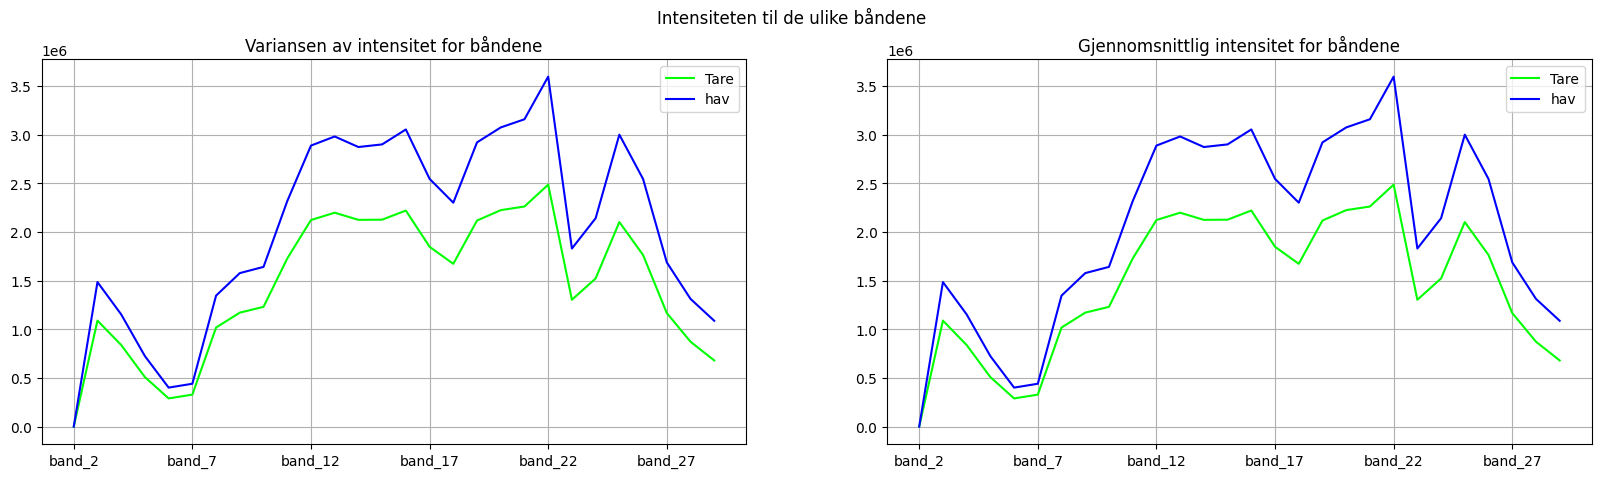

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,5))

#X_var.drop(columns = "label").var().plot(ax = ax1, color = "green", label = "Alle instanser")
X_var[X_var.label == 1].drop(columns = "label").var()[2:30].plot(ax = ax1, color = "lime", label = "Tare")
X_var[X_var.label == 0].drop(columns = "label").var()[2:30].plot(ax = ax1, color = "blue", label = "hav")
ax1.set_title("Variansen av intensitet for båndene")
ax1.grid()
ax1.legend()

#X_var.drop(columns = "label").mean().plot(ax = ax2, color = "green", label = "Alle instanser")
X_var[X_var.label == 1].drop(columns = "label").var()[2:30].plot(ax = ax2, color = "lime", label = "Tare")
X_var[X_var.label == 0].drop(columns = "label").var()[2:30].plot(ax = ax2, color = "blue", label = "hav")
ax2.set_title("Gjennomsnittlig intensitet for båndene")
ax2.legend()
ax2.grid()

fig.suptitle("Intensiteten til de ulike båndene")

Text(0.5, 0.98, 'Variansen av intensitet for båndene mellom 56 og 61')

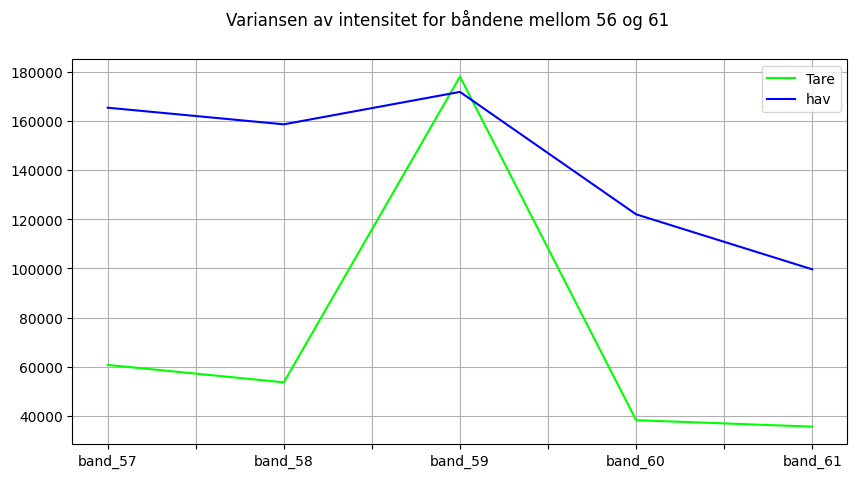

In [26]:
fig, (ax1) = plt.subplots(1,1, figsize = (10,5))

#X_var.drop(columns = "label").var().plot(ax = ax1, color = "green", label = "Alle instanser")
X_var[X_var.label == 1].drop(columns = "label").var()[57:62].plot(ax = ax1, color = "lime", label = "Tare")
X_var[X_var.label == 0].drop(columns = "label").var()[57:62].plot(ax = ax1, color = "blue", label = "hav")

ax1.grid()
ax1.legend()


fig.suptitle("Variansen av intensitet for båndene mellom 56 og 61")

In [12]:
for i in X_var[X_var.label == 1].drop(columns = "label").var(): 
    print(i)

0.0
0.0
0.0
1089508.6076701663
838744.441860163
509191.36442421156
290036.43383470766
328955.31251286704
1018427.2555127402
1171536.3233340343
1231129.6189940819
1727429.0327381098
2123336.298186651
2198638.5376824667
2125028.1082252734
2126850.7640448157
2220755.018294722
1848555.8358926922
1673336.045466984
2118143.7676046393
2224892.8302515494
2262241.679475579
2486814.9514340553
1303965.8921440816
1522887.9975325912
2102380.846354305
1763742.949611236
1167530.003511128
872792.9868263686
680271.0540137333
357063.7866489239
221207.64839948958
228781.3725852734
225946.17463903205
211731.6353504773
220248.99808545134
224024.85181973517
213578.24959895047
207328.94622527275
198120.0961288773
191794.8027585898
170591.20078658315
169068.25824958962
169604.0357047919
153489.18714273453
153794.77213835635
172348.24575890656
151737.38274293597
120115.85758830913
99143.57671081697
71017.47654998742
63698.2542027182
60612.38796689058
57645.681916019006
57708.87434860133
55645.93742524928
57765

In [8]:
X_info = X.drop(columns = ['Unnamed: 0', 'band_0', 'band_1', 'band_2', 'band_3', 'band_4',
       'band_5', 'band_6', 'band_7', 'band_8', 'band_9', 'band_10', 'band_11',
       'band_12', 'band_13', 'band_14', 'band_15', 'band_16', 'band_17',
       'band_18', 'band_19', 'band_20', 'band_21', 'band_22', 'band_23',
       'band_24', 'band_25', 'band_26', 'band_27', 'band_28', 'band_29',
       'band_30', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35',
       'band_36', 'band_37', 'band_38', 'band_39', 'band_40', 'band_41',
       'band_42', 'band_43', 'band_44', 'band_45', 'band_46', 'band_47',
       'band_48', 'band_49', 'band_50', 'band_51', 'band_52', 'band_53',
       'band_54', 'band_55', 'band_56', 'band_57', 'band_58', 'band_59',
       'band_60', 'band_61', 'band_62', 'band_63', 'band_64', 'band_65', 'lat',
       'lon', 'geometry', ])

In [9]:
X_info.value_counts()

label
0.0      946261
1.0       53739
Name: count, dtype: int64